<a href="https://colab.research.google.com/github/keith-ang/Titanic-Project/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

In this notebook, we will be going through one of Kaggle's machine learning competitions: https://www.kaggle.com/c/titanic/overview.

We will be using a machine learning model to predict which passengers survived the Titanic shipwreck. Since we are predicting whether a passenger has survived or not, this problem is a **classification problem**.

## 1. Problem Definition

The problem that we are trying to solve here is:

> Given the data of the passengers onboard the Titanic, are we able to predict who is more likely to survive?

## 2. Data

Kaggle has provided 2 datasets of the passengers data:
* train.csv - the dataset that we use to train our machine learning model on
* test.csv - the dataset that we will make our predictions on

## 3. Evaluation

The evaluation metric we will be using is accuracy. Since it is the default metric when we perform `model.score()`, we do not have to create a custom evaluation function.

## 4. Features

To better understand the data, Kaggle has provided us with a data dictionary of the different features in the dataset.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dict = pd.DataFrame({'Variable': ['survival', 'pclass', 'sex', 'Age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'],
                          'Definition': ['Survival', 'Ticket Class', 'Sex', 'Age in years', '# of siblings / spouses aboard the Titanic', '# of parents / children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number', 'Port of embarkation'],
                          'Key': ['0 = No, 1 = Yes', '1 = 1st, 2 = 2nd, 3 = 3rd', '','','','','','','','C = Cherbourg, Q = Queenstown, S = Southampton']})
data_dict

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket Class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [6]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic-project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic-project/data/test.csv')

In [7]:
train = train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [8]:
df = pd.concat([train, test], ignore_index=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


## Exploratory Data Analysis

We will now analyse the data to have a better understanding of the patterns of passengers on the Titanic.

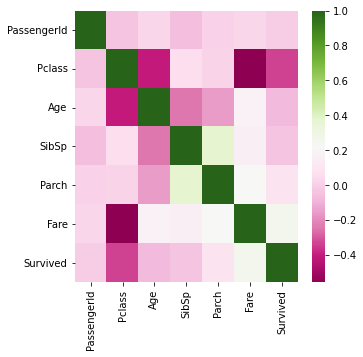

In [9]:
# Finding the correlation between the different features

df_corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(df_corr, cmap='PiYG');

### Observations of relationships between features:
* Pclass and Fare have a negative relationship, the higher the Pclass(3rd class), the lower the fare will be, which makes sense.
* The higher the Pclass(3rd class), the more likely the passenger will not survive.
* The older the passenger, the lower the Pclass(1st class), as older passengers tend to be wealthier.

In [10]:
# Checking how many passengers survived (1) and did not survive (0)
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

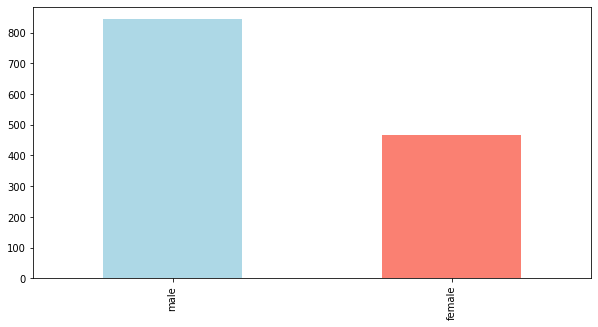

In [11]:
# Seeing how many male and female passengers there are
df['Sex'].value_counts().plot(kind='bar', 
                              color=['lightblue','salmon'], 
                              figsize=(10,5));

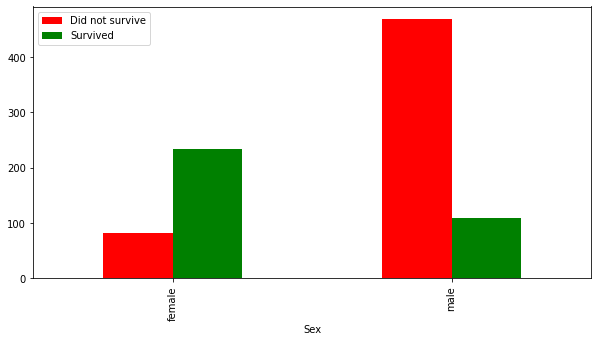

In [12]:
# Seeing the relationship between the sex of the passenger and their survivability
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', 
                                            figsize=(10,5),
                                            color=['red','green'])
plt.legend(['Did not survive', 'Survived'], 
           loc='upper left');

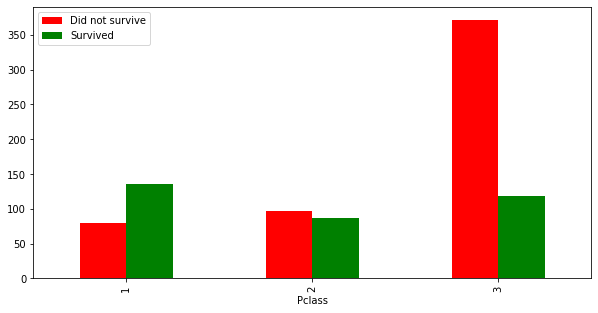

In [13]:
# Seeing the relationship between the passenger's Pclass and their survivability
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', 
                                               figsize=(10,5),
                                               color=['red', 'green'])
plt.legend(['Did not survive', 'Survived'], 
           loc='upper left');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


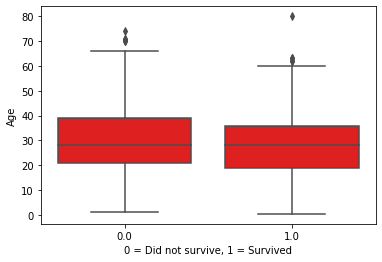

In [14]:
# Seeing the relationship between the passenger's age and their survivability
sns.boxplot(df['Survived'], df['Age'],
            color='red')
plt.xlabel('0 = Did not survive, 1 = Survived'); 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


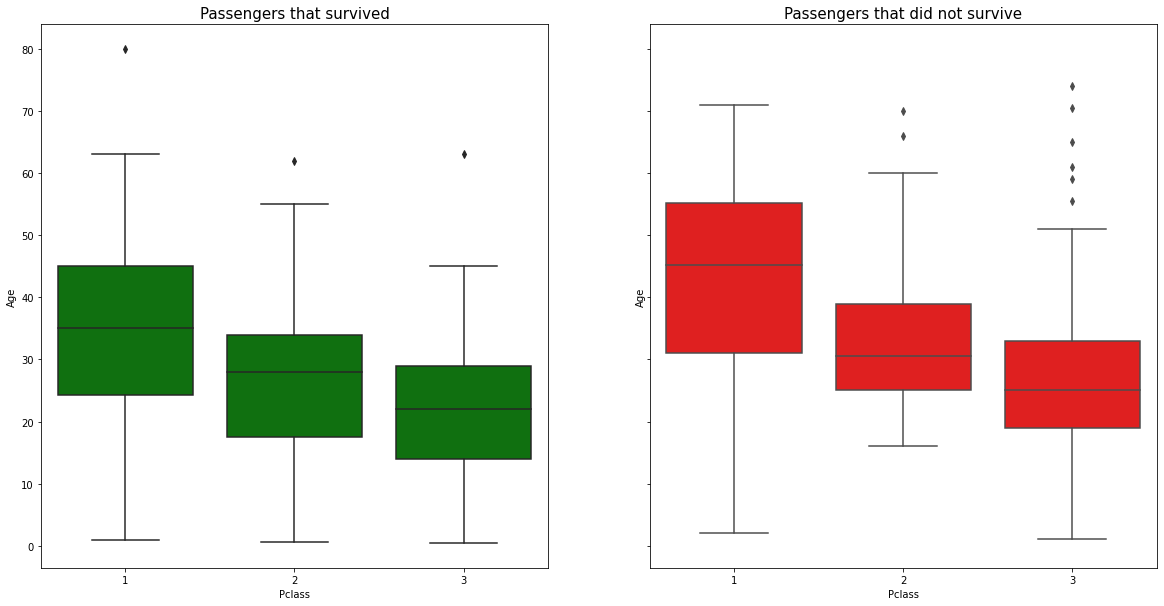

In [15]:
# Seeing the relationship between the age and pclass of the passengers
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(20,10),
                               sharey=True)
sns.boxplot(df['Pclass'][df['Survived']==1],
            df['Age'][df['Survived']==1],
            color='green',
            ax=ax1)
ax1.set_title('Passengers that survived', fontsize=15)
sns.boxplot(df['Pclass'][df['Survived']==0],
            df['Age'][df['Survived']==0],
            color='red',
            ax=ax2)
ax2.set_title('Passengers that did not survive', fontsize=15);

## Cleaning up/Preprocessing of data

We will now do some preprocessing of our data so that we can pass it to a machine learning model.

We will first make a copy of our original DataFrame so we can make our changes to the copied one.

In [16]:
df_temp = df.copy()

### Cabins

All first class passengers have a cabin number (eg. C123), and we will just generalise the cabin numbers into categories according to their first letter.

In [17]:
df_temp['Deck'] = df_temp['Cabin'].str.get(0)
df_temp['Deck'].fillna('Missing', inplace=True)

### Family Size

Since the parch and sibsp columns are related, we can add the both together to find out how many family members each member had with them. 

The family size column would show how many family members the passenger had, including themselves.

In [18]:
df_temp['Family_Size'] = df['SibSp'] + df['Parch'] +1

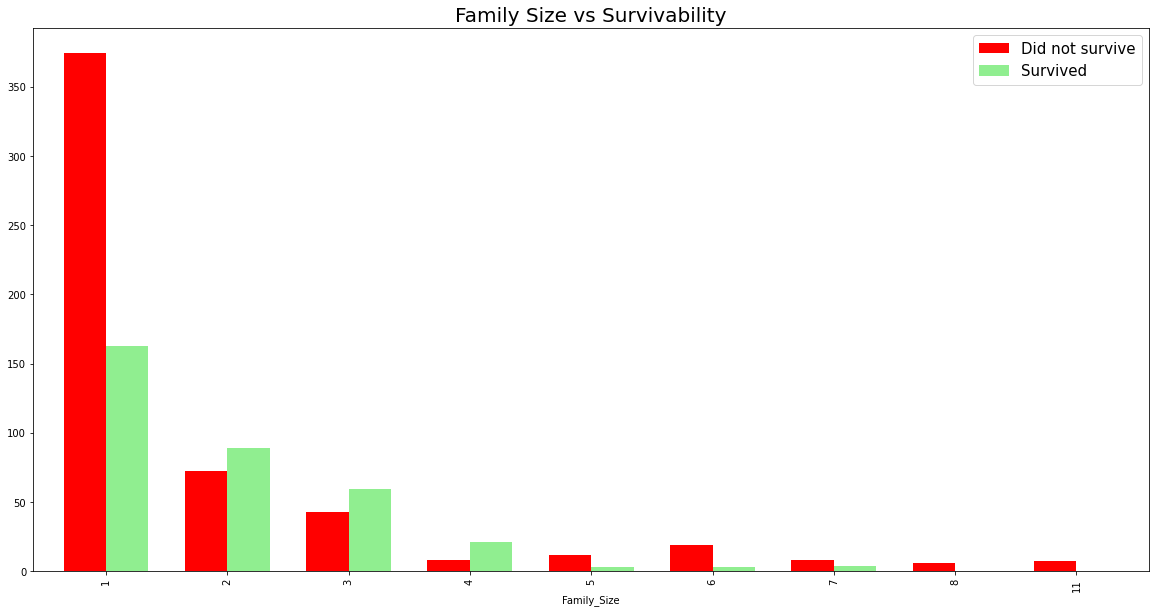

In [19]:
pd.crosstab(df_temp['Family_Size'], df['Survived']).plot.bar(figsize=(20,10),
                                                             color=['red', 'lightgreen'],
                                                             width=0.7)
plt.legend(['Did not survive', 'Survived'],
           fontsize=15)
plt.title('Family Size vs Survivability',
          fontsize=20);

In [20]:
df_temp.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
df_temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Deck,Family_Size
0,3,male,22.0,1,0,7.2500,S,0.0,Missing,2
1,1,female,38.0,1,0,71.2833,C,1.0,C,2
2,3,female,26.0,0,0,7.9250,S,1.0,Missing,1
3,1,female,35.0,1,0,53.1000,S,1.0,C,2
4,3,male,35.0,0,0,8.0500,S,0.0,Missing,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S,NaN,Missing,1
1305,1,female,39.0,0,0,108.9000,C,NaN,C,1
1306,3,male,38.5,0,0,7.2500,S,NaN,Missing,1
1307,3,male,NaN,0,0,8.0500,S,NaN,Missing,1


## Filling missing data

In [22]:
df_temp.isna().sum()

Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
Survived       418
Deck             0
Family_Size      0
dtype: int64

In [23]:
# Filling the missing ages with the mean
df_temp['Age'].fillna(df_temp['Age'].mean(), inplace=True)

In [24]:
# Filling the missing fare with the mean
df_temp['Fare'].fillna(df_temp['Fare'].mean(), inplace=True)

In [25]:
# Filling the missing Embarked values with S which is the mode
df_temp['Embarked'].fillna('S', inplace=True)

## Converting string type data to categories

In [26]:
df_temp.dtypes

Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Survived       float64
Deck            object
Family_Size      int64
dtype: object

In [27]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()
        df_temp[label] = pd.Categorical(content).codes

## Splitting data into train, validation and test sets

In [28]:
final_features = pd.get_dummies(df_temp).reset_index(drop=True)
final_features.drop('Survived', axis=1, inplace=True)
final_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size
0,3,1,22.000000,1,0,7.2500,2,7,2
1,1,0,38.000000,1,0,71.2833,0,2,2
2,3,0,26.000000,0,0,7.9250,2,7,1
3,1,0,35.000000,1,0,53.1000,2,2,2
4,3,1,35.000000,0,0,8.0500,2,7,1
...,...,...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,8.0500,2,7,1
1305,1,0,39.000000,0,0,108.9000,0,2,1
1306,3,1,38.500000,0,0,7.2500,2,7,1
1307,3,1,29.881138,0,0,8.0500,2,7,1


In [29]:
X_trainval = final_features[:len(train)]
X_test = final_features[len(train):]
y_trainval = train['Survived']

In [30]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size
891,3,1,34.500000,0,0,7.8292,1,7,1
892,3,0,47.000000,1,0,7.0000,2,7,2
893,2,1,62.000000,0,0,9.6875,1,7,1
894,3,1,27.000000,0,0,8.6625,2,7,1
895,3,0,22.000000,1,1,12.2875,2,7,3
...,...,...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,8.0500,2,7,1
1305,1,0,39.000000,0,0,108.9000,0,2,1
1306,3,1,38.500000,0,0,7.2500,2,7,1
1307,3,1,29.881138,0,0,8.0500,2,7,1


### Splitting data into train and validation sets

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(50)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)

In [32]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 9), (179, 9), (712,), (179,))

In [33]:
X_train.dtypes, X_val.dtypes, y_train.dtypes, y_val.dtypes

(Pclass           int64
 Sex               int8
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked          int8
 Deck              int8
 Family_Size      int64
 dtype: object, Pclass           int64
 Sex               int8
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked          int8
 Deck              int8
 Family_Size      int64
 dtype: object, dtype('int64'), dtype('int64'))

## Training a machine learning model

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
def check_model_score(model):
    model.fit(X_train, y_train)
    return cross_val_score(model, X_val, y_val).mean()

In [36]:
check_model_score(RandomForestClassifier())

0.7315873015873017

In [37]:
check_model_score(GradientBoostingClassifier())

0.7201587301587301

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
model.score(X_val, y_val)

0.8379888268156425

In [40]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {'n_estimators': np.arange(120,200,10),
           'max_depth': [None, 2, 4],
           'min_samples_split': np.arange(0,20,2),
           'min_samples_leaf': np.arange(0,50,10),
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_impurity_decrease': np.arange(0,60,20)}

rs_model = RandomizedSearchCV(GradientBoostingClassifier(),
                              param_distributions=rs_grid,
                              cv=5,
                              verbose=True,
                              n_jobs=-1,
                              n_iter=300)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
430 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    t

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': array([ 0, 20, 40]),
                                        'min_samples_leaf': array([ 0, 10, 20, 30, 40]),
                                        'min_samples_split': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([120, 130, 140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [41]:
rs_model.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'min_impurity_decrease': 0,
 'min_samples_leaf': 40,
 'min_samples_split': 6,
 'n_estimators': 150}

In [42]:
preds = rs_model.predict(X_test)
len(preds)

418

In [43]:
output = pd.DataFrame({'PassengerId': range(892,1310), 'Survived': preds})

In [46]:
output.to_csv('/content/drive/MyDrive/Colab Notebooks/titanic-project/my_submission.csv', index=False)

In [45]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
